In [77]:
import numpy as np

In [78]:
import keras

In [79]:
import tensorflow as tf

In [80]:
from tensorflow.keras.layers import Embedding

In [81]:
input_sentence="i am king of these kingdom like eating apples which are good"

In [82]:
ip_sentence="i am queen of these kingdom like eating bananas which are good,but some are bad"

In [83]:
d=3

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [86]:
ip=Tokenizer()

In [87]:
ip.fit_on_texts([input_sentence])

In [88]:
x=ip.texts_to_sequences([input_sentence])

In [89]:
dict1=ip.word_index

In [90]:
dict1

{'i': 1,
 'am': 2,
 'king': 3,
 'of': 4,
 'these': 5,
 'kingdom': 6,
 'like': 7,
 'eating': 8,
 'apples': 9,
 'which': 10,
 'are': 11,
 'good': 12}

In [91]:
vocab=len(dict1)+1

In [92]:
dict4=ip.index_word

In [93]:
dict4

{1: 'i',
 2: 'am',
 3: 'king',
 4: 'of',
 5: 'these',
 6: 'kingdom',
 7: 'like',
 8: 'eating',
 9: 'apples',
 10: 'which',
 11: 'are',
 12: 'good'}

In [94]:
ll1=x[0]
ll1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [95]:
m=[]
for i in ll1:
    m.append(dict4[i])
m

['i',
 'am',
 'king',
 'of',
 'these',
 'kingdom',
 'like',
 'eating',
 'apples',
 'which',
 'are',
 'good']

In [96]:
x

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

In [97]:
x=np.array(x)

In [98]:
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [99]:
embed=Embedding(vocab,d,trainable=True,embeddings_initializer='glorot_uniform')

In [100]:
out1=embed(x)

In [101]:
out1.shape

TensorShape([1, 12, 3])

In [102]:
out1

<tf.Tensor: shape=(1, 12, 3), dtype=float32, numpy=
array([[[ 0.15723693, -0.22258419,  0.3126558 ],
        [-0.2509266 ,  0.36634886,  0.1305722 ],
        [ 0.42136294,  0.14215446, -0.52321523],
        [ 0.329489  ,  0.31761897, -0.21592975],
        [-0.38528007, -0.34014562,  0.30403578],
        [-0.59109926,  0.01895559,  0.43040508],
        [ 0.19164366, -0.09256011,  0.03041112],
        [ 0.05967569, -0.01246291, -0.4871185 ],
        [-0.41914296, -0.61029255,  0.08510178],
        [ 0.47727007, -0.0630663 , -0.4990395 ],
        [-0.3918882 , -0.45488983,  0.1191628 ],
        [ 0.23008597, -0.4250227 , -0.01996636]]], dtype=float32)>

In [103]:
ip1=Tokenizer()

In [104]:
ip1.fit_on_texts([ip_sentence])

In [105]:
x1=ip1.texts_to_sequences([ip_sentence])

In [106]:
dict2=ip1.word_index

In [107]:
dict2

{'are': 1,
 'i': 2,
 'am': 3,
 'queen': 4,
 'of': 5,
 'these': 6,
 'kingdom': 7,
 'like': 8,
 'eating': 9,
 'bananas': 10,
 'which': 11,
 'good': 12,
 'but': 13,
 'some': 14,
 'bad': 15}

In [108]:
vocab2=len(dict2)+1

In [109]:
dict3=ip1.index_word

In [110]:
ll=x1[0]
ll

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 12, 13, 14, 1, 15]

In [111]:
l=[]
for i in ll:
    l.append(dict3[i])
l

['i',
 'am',
 'queen',
 'of',
 'these',
 'kingdom',
 'like',
 'eating',
 'bananas',
 'which',
 'are',
 'good',
 'but',
 'some',
 'are',
 'bad']

In [112]:
x1=np.array(x1)
x1,x1.shape

(array([[ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1, 12, 13, 14,  1, 15]]),
 (1, 16))

In [113]:
embed1=Embedding(vocab2,d,trainable=True,embeddings_initializer='glorot_uniform')

In [114]:
out2=embed1(x1)

In [115]:
out2.shape

TensorShape([1, 16, 3])

In [116]:
out2[0,2:3].shape

TensorShape([1, 3])

In [117]:
king=out1[0,2:3]
queen=out2[0,2:3]

kingdom1=out1[0,5:6]
kingdom2=out2[0,5:6]

apple=out1[0,8:9]
banana=out2[0,8:9]

good=out1[0,11:12]
bad=out2[0,15:16]

In [118]:
king.shape,queen.shape

(TensorShape([1, 3]), TensorShape([1, 3]))

In [119]:
from sklearn.metrics.pairwise import cosine_similarity

In [120]:
similarity_matrix=cosine_similarity(king,queen)
similarity_matrix1=cosine_similarity(kingdom1,kingdom2)
similarity_matrix2=cosine_similarity(apple,banana)
similarity_matrix3=cosine_similarity(good,bad)

In [121]:
similarity_matrix,similarity_matrix1,similarity_matrix2,similarity_matrix3

(array([[-0.9501164]], dtype=float32),
 array([[-0.8181719]], dtype=float32),
 array([[0.18067066]], dtype=float32),
 array([[-0.41419426]], dtype=float32))

## No uniform initialization

In [122]:
embed11=Embedding(vocab,d,trainable=True)

In [123]:
embed12=Embedding(vocab2,d,trainable=True)

In [124]:
out11=embed11(x)
out12=embed12(x1)

In [125]:
out11.shape,out12.shape

(TensorShape([1, 12, 3]), TensorShape([1, 16, 3]))

In [126]:
king=out11[0,2:3]
queen=out12[0,2:3]

kingdom1=out11[0,5:6]
kingdom2=out12[0,5:6]

apple=out11[0,8:9]
banana=out12[0,8:9]

good=out11[0,11:12]
bad=out12[0,15:16]

In [127]:
similarity_matrix=cosine_similarity(king,queen)
similarity_matrix1=cosine_similarity(kingdom1,kingdom2)
similarity_matrix2=cosine_similarity(apple,banana)
similarity_matrix3=cosine_similarity(good,bad)

In [128]:
similarity_matrix,similarity_matrix1,similarity_matrix2,similarity_matrix3

(array([[-0.04743976]], dtype=float32),
 array([[-0.09823968]], dtype=float32),
 array([[0.8616321]], dtype=float32),
 array([[-0.39850342]], dtype=float32))

# No training

In [129]:
embed21=Embedding(vocab,d)
embed22=Embedding(vocab2,d)
out21=embed21(x)
out22=embed22(x1)

king=out21[0,2:3]
queen=out22[0,2:3]

kingdom1=out21[0,5:6]
kingdom2=out22[0,5:6]

apple=out21[0,8:9]
banana=out22[0,8:9]

good=out21[0,11:12]
bad=out22[0,15:16]

In [130]:
similarity_matrix=cosine_similarity(king,queen)
similarity_matrix1=cosine_similarity(kingdom1,kingdom2)
similarity_matrix2=cosine_similarity(apple,banana)
similarity_matrix3=cosine_similarity(good,bad)

In [131]:
similarity_matrix,similarity_matrix1,similarity_matrix2,similarity_matrix3

(array([[-0.64786416]], dtype=float32),
 array([[0.5084768]], dtype=float32),
 array([[0.51049656]], dtype=float32),
 array([[0.8298749]], dtype=float32))

In [132]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [133]:
pca = PCA(n_components=2)
embedded_vectors = pca.fit_transform(out1[0])
embedded_vectors1 = pca.fit_transform(out2[0])

In [134]:
embedded_vectors11 = pca.fit_transform(out11[0])
embedded_vectors12 = pca.fit_transform(out12[0])

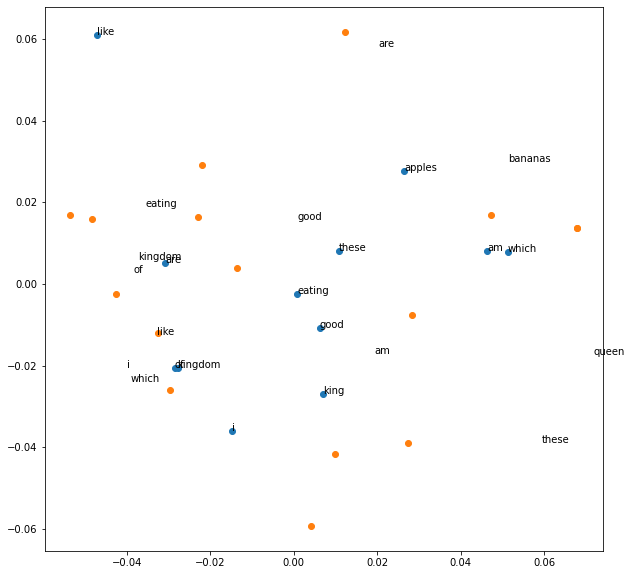

In [135]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors11[:, 0], embedded_vectors11[:, 1])
plt.scatter(embedded_vectors12[:, 0], embedded_vectors12[:, 1])
for i, (x, y) in enumerate(embedded_vectors11):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors21):
    plt.annotate(l[i], (x, y))


plt.show()

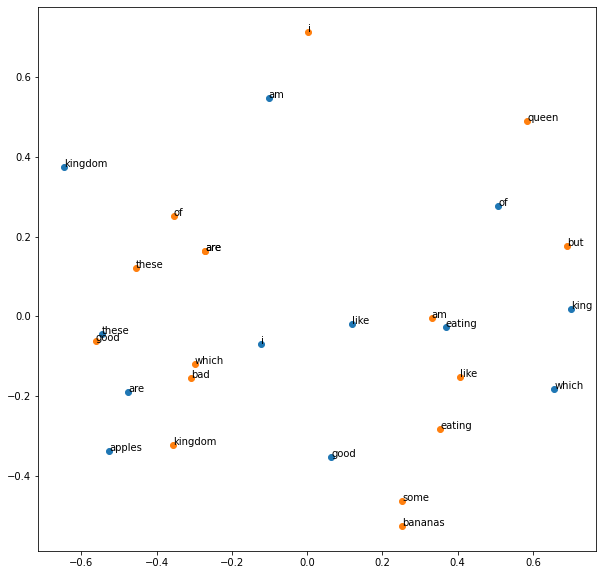

In [136]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1])
plt.scatter(embedded_vectors1[:, 0], embedded_vectors1[:, 1])
for i, (x, y) in enumerate(embedded_vectors):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors1):
    plt.annotate(l[i], (x, y))


plt.show()

In [137]:
embedded_vectors21 = pca.fit_transform(out21[0])
embedded_vectors22 = pca.fit_transform(out22[0])

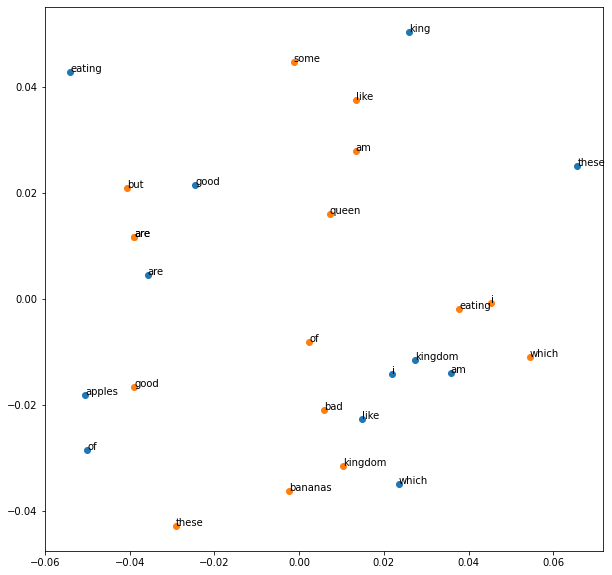

In [138]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors21[:, 0], embedded_vectors21[:, 1])
plt.scatter(embedded_vectors22[:, 0], embedded_vectors22[:, 1])
for i, (x, y) in enumerate(embedded_vectors21):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors22):
    plt.annotate(l[i], (x, y))


plt.show()

In [ ]:
#input_sentence="i am king of these kingdom like eating apples which are good"
#ip_sentence="i am queen of these kingdom like eating bananas which are good,but some are bad"

In [139]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors2 = tsne.fit_transform(out1[0])
embedded_vectors3 = tsne.fit_transform(out2[0])

C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


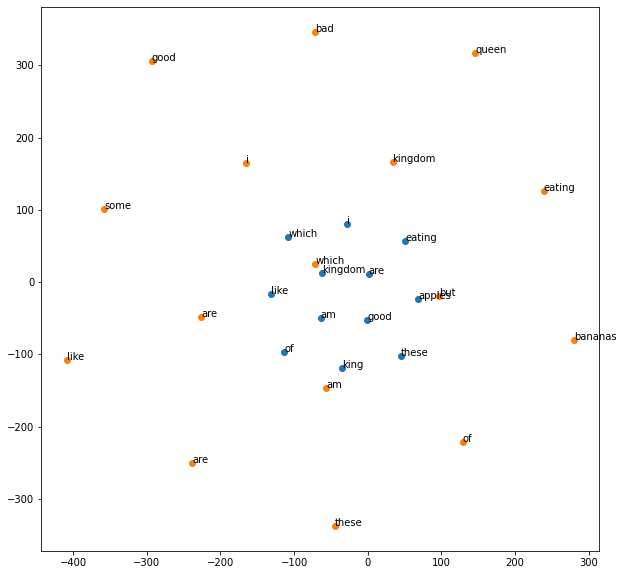

In [70]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors2[:, 0], embedded_vectors2[:, 1])
plt.scatter(embedded_vectors3[:, 0], embedded_vectors3[:, 1])
for i, (x, y) in enumerate(embedded_vectors2):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors3):
    plt.annotate(l[i], (x, y))


plt.show()

C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


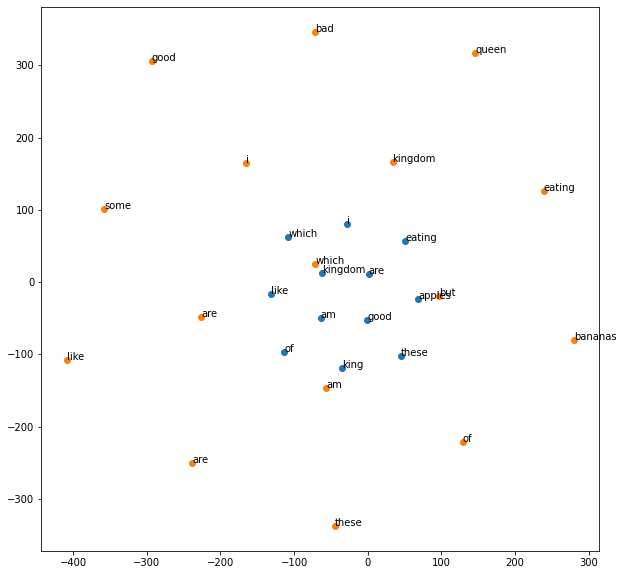

In [140]:
embedded_vectors11 = tsne.fit_transform(out11[0])
embedded_vectors12 = tsne.fit_transform(out12[0])

plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors11[:, 0], embedded_vectors11[:, 1])
plt.scatter(embedded_vectors12[:, 0], embedded_vectors12[:, 1])
for i, (x, y) in enumerate(embedded_vectors11):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors12):
    plt.annotate(l[i], (x, y))


plt.show()

C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rambabu\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


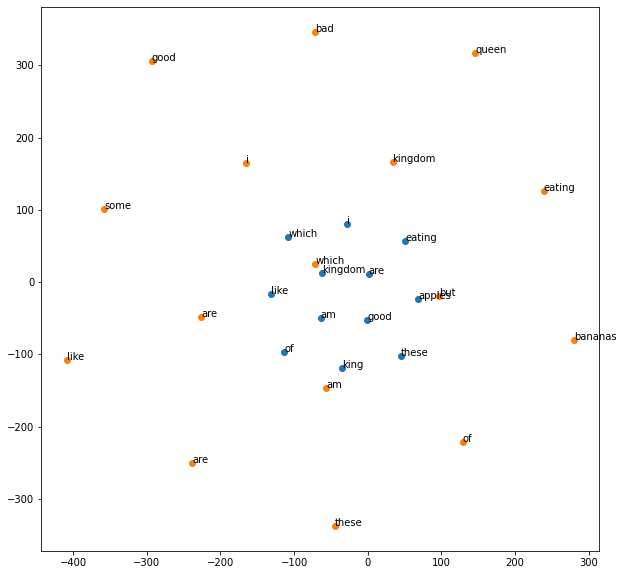

In [141]:
embedded_vectors11 = tsne.fit_transform(out21[0])
embedded_vectors12 = tsne.fit_transform(out22[0])

plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors11[:, 0], embedded_vectors11[:, 1])
plt.scatter(embedded_vectors12[:, 0], embedded_vectors12[:, 1])
for i, (x, y) in enumerate(embedded_vectors11):
    plt.annotate(m[i], (x, y))
    
for i, (x, y) in enumerate(embedded_vectors12):
    plt.annotate(l[i], (x, y))


plt.show()